### Startup Success Prediction ###


Technology development is becoming increasingly important for startups, as it has the potential to significantly increase the chances of success for any new venture. It can help startups scale quickly by providing access to resources such as cloud computing and artificial intelligence. By leveraging these technologies, startups can create innovative products and services that meet the needs of customers.

In the dynamic startup world, success is a rare gem. Understanding what makes these high-risk ventures successful is a relevant challenge for investors and entrepreneurs.

While some become unicorns valued at over $1 billion, many face challenges and close shop.

Predicting success becomes a competitive advantage for venture capitalists seeking investments, allowing them to stay one step ahead of the competition.

We will use machine learning techniques, to create a predictive model that has as the dependent variable a label to classify whether a start-up is (already) successful or not.

To generate the predictive model, three supervised machine learning algorithms were tested:

- Support Vector Machines
- Gradient Boosting
- Random Forests.


**The objective**

Development of a predictive model to classify a start-up/company as successful or not (binary classification).

**About Dataset**

The data utilized in this article is the database sourced from the world's largest data science community, www.kaggle.com.

In the course of this analysis, the article aims to answer key questions, including:

**1. Predictive Insights:**

- Can the model provide insights into the likelihood of success for a new startup?

**2. Comparative Analysis:**
- How do different machine learning algorithms (Support Vector Machines, Gradient Boosting, Random Forests) perform in predicting startup success?

**3. Feature Importance:**

- What features or variables have the most significant impact on the model's predictions?
- How does each feature contribute to the prediction of startup success?

**4. Application in Real Scenarios:**

- **How well does the model generalize to real-world startup data beyond the dataset used for training?**
- Can the model be applied to predict success in different industries or business sectors?

**5. Continuous Improvement:**

- How can the model be updated or refined over time as new data becomes available?
- What strategies can be employed to enhance the model's accuracy and relevance?


##### 1. Import the necessary libraires

In [101]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

##### 2. Loading the database

In [102]:
#Make sure you're aware of the current working directory in your Jupyter notebook.
import os
print(os.getcwd())

/Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook


In [103]:
# Assuming this notebook is in the 'notebook' directory
notebook_directory = '/Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook'

In [104]:
# Construct the full file path from the notebook directory
file_path = os.path.join(notebook_directory, '..', 'data', 'startup.csv')

In [105]:
# It's time to read in our training and testing data using pd.read_csv, 
#and take a first look using the describe() function.
data = pd.read_csv(file_path, encoding="ISO-8859-1")

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [107]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [108]:
len(data)

923

##### 3. Data Preprocessing

Data pre-processing can often have a critical impact on general performance of a supervised machine
learning task. 

The data pre-processing consists in a 3-step process:

  1. Data cleaning, where the author aims to remove all redundant and irrelevant information
from the database as well as duplicates, missing values and outliers.
  2. Data selection, where the context of the study (i.e., social-demographic criteria) is defined to
filter which data will be taken into the final dataset and
  3. Data transformation, consisting on the process of creating new variables or aggregating data
from different tables into organization’s table.

while Random Forests are known for their ease of use and robustness to certain types of data, investing time in understanding your data through visualizations and exploring potential preprocessing steps can still be beneficial.

**1. Data Cleaning**

In [109]:
import pandas as pd
from tabulate import tabulate

# Extract feature names from the DataFrame
feature_names = data.columns.tolist()

# Feature descriptions
feature_descriptions = {
    'Unnamed: 0': 'Index or identifier',
    'state_code': 'Code representing the state',
    'latitude': 'Geographical latitude',
    'longitude': 'Geographical longitude',
    'zip_code': 'Postal code',
    'id': 'Identifier',
    'city': 'City name',
    'Unnamed: 6': 'Additional index or identifier',
    'name': 'Entity name',
    'labels': 'Labels or categories',
    'founded_at': 'Date of foundation',
    'closed_at': 'Date of closure',
    'first_funding_at': 'Date of first funding round',
    'last_funding_at': 'Date of last funding round',
    'age_first_funding_year': 'Age at first funding (in years)',
    'age_last_funding_year': 'Age at last funding (in years)',
    'age_first_milestone_year': 'Age at first milestone (in years)',
    'age_last_milestone_year': 'Age at last milestone (in years)',
    'relationships': 'Number of relationships',
    'funding_rounds': 'Number of funding rounds',
    'funding_total_usd': 'Total funding amount in USD',
    'milestones': 'Number of milestones achieved',
    'state_code.1': 'Additional state code',
    'is_CA': 'Is in California',
    'is_NY': 'Is in New York',
    'is_MA': 'Is in Massachusetts',
    'is_TX': 'Is in Texas',
    'is_otherstate': 'Is in another state',
    'category_code': 'Category code',
    'is_software': 'Is in the software category',
    'is_web': 'Is in the web category',
    'is_mobile': 'Is in the mobile category',
    'is_enterprise': 'Is in the enterprise category',
    'is_advertising': 'Is in the advertising category',
    'is_gamesvideo': 'Is in the games/video category',
    'is_ecommerce': 'Is in the e-commerce category',
    'is_biotech': 'Is in the biotech category',
    'is_consulting': 'Is in the consulting category',
    'is_othercategory': 'Is in another category',
    'object_id': 'Identifier of an object',
    'has_VC': 'Has venture capital investment',
    'has_angel': 'Has angel investment',
    'has_roundA': 'Has Round A funding',
    'has_roundB': 'Has Round B funding',
    'has_roundC': 'Has Round C funding',
    'has_roundD': 'Has Round D funding',
    'avg_participants': 'Average number of participants in funding rounds',
    'is_top500': 'Is in the top 500',
    'status': 'Status of the entity (e.g., active, closed)'
}

# Function to determine feature type based on data type
def get_feature_info(feature):
    data_type = data[feature].dtype
    description = feature_descriptions.get(feature, '')
    feature_type = 'Unknown'

    if pd.api.types.is_object_dtype(data_type):
        feature_type = 'Nominal'
    elif pd.api.types.is_numeric_dtype(data_type):
        feature_type = 'Interval'
    elif pd.api.types.is_datetime64_any_dtype(data_type):
        feature_type = 'Datetime'

    return {
        'Features': feature,
        'Description': description,
        'Type': feature_type
    }

# Create DataFrame using list comprehension
df_other = pd.DataFrame([get_feature_info(feature) for feature in feature_names])

# Display all rows of the DataFrame using tabulate
print(tabulate(df_other, headers='keys', tablefmt='pretty'))


+----+--------------------------+--------------------------------------------------+----------+
|    |         Features         |                   Description                    |   Type   |
+----+--------------------------+--------------------------------------------------+----------+
| 0  |        Unnamed: 0        |               Index or identifier                | Interval |
| 1  |        state_code        |           Code representing the state            | Nominal  |
| 2  |         latitude         |              Geographical latitude               | Interval |
| 3  |        longitude         |              Geographical longitude              | Interval |
| 4  |         zip_code         |                   Postal code                    | Nominal  |
| 5  |            id            |                    Identifier                    | Nominal  |
| 6  |           city           |                    City name                     | Nominal  |
| 7  |        Unnamed: 6        |       

**Drop the irrelevant features from 48 columns**

The first step of pre-processing consists on treating all the irrelevant and redundant information
present in table.

The Kaggle dataset has several columns (features) and instances (observations) whose context don’t match the objective of
predicting a start-up’s success.

In [110]:
clean_data = data.drop(['Unnamed: 0','latitude','longitude','zip_code','id','Unnamed: 6','name','labels','state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','object_id'], axis=1).copy()
clean_data

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,acquired
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,acquired
2,CA,San Diego,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,acquired
3,CA,Cupertino,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,acquired
4,CA,San Francisco,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,...,advertising,0,0,1,0,0,0,6.0000,1,acquired
919,MA,Burlington,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,...,security,1,0,0,1,0,0,2.6667,1,closed
920,CA,Sunnyvale,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,...,biotech,0,0,0,0,0,1,8.0000,1,closed
921,CA,San Francisco,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,...,software,0,0,1,1,0,0,1.0000,1,acquired


 **General changes:*
 
 Columns deleted that provide too much granularity or doesnt represent meaningful information are the following: 
 
- "Unnamed: 0"
- "Latitude"
- "Longitude"
- "zip code"
- "id" 
- "name"
- all columns started by is 
  
It is also important to evaluate the redundancy of certain observations by looking for the presence of
duplicates:

- "Unnamed: 6"
- "state_code.1" 
- "object_id"
- "labels" : A numerical representation of the same information as 'status', drop it to avoid redundancy and potential confusion.

Only a few duplicate instances were found in the database and all were removed.

In [111]:
num_columns = len(clean_data.columns)
print(f"After dropping irrelevant features The DataFrame has {num_columns} columns.")

After dropping irrelevant features The DataFrame has 24 columns.


**Handle missing values**

The second step consists on eliminating noisy or unreliable data being the two most common cases
of inconsistencies, Missing Values and Outliers. 

A Missing value (or missing data) is a variable that has no data value stored in an observation. Missing values are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. 

In [112]:
x= clean_data.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
category_code                 0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
funding_total_usd             0
milestones                    0
city                          0
funding_rounds                0
relationships                 0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
status                        0
dtype: int64

In [113]:
# Assuming 'data' is your DataFrame
null = pd.DataFrame(clean_data.isnull().sum(), columns=["Null Values"])
null["% Missing Values"] = (clean_data.isna().sum() / len(clean_data) * 100)
null = null[null["% Missing Values"] > 0]
styled_null = (
    null.style
    .background_gradient(cmap='viridis', low=0.2, high=0.1)
)
styled_null

,Null Values,% Missing Values
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039


In [114]:
# 2. Impute missing values with 0 to 'age_first_milestone_year'
clean_data['age_first_milestone_year'].fillna(0, inplace=True)

# 3. Impute missing values with 0 to 'age_last_milestone_year'
clean_data['age_last_milestone_year'].fillna(0, inplace=True)

**General Changes:*

- Imputed values for 'age_first_milestone_year' and 'age_last_milestone_year'.
- Handling Missing Values in 'closed_at': Missing values in 'closed_at' represent startups that are still open and will not be filled. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date.

**2.Data Selection**

In [115]:
numerical_features = clean_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = clean_data.select_dtypes(include=['object']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['status']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (16):
['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

Categorical Features (8):
['state_code', 'city', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'category_code', 'status']

Target Variable (1):
['status']


**3. Data Transformation**

Target Variable 

In [116]:
clean_data['status'].value_counts()
#In a binary classification problem like predicting whether a startup 
#will be "acquired" or "closed," a balanced dataset typically means that you have a roughly equal 
#number of examples for each class. In your case, you have 597 examples of "acquired" and 326 examples of "closed."

status
acquired    597
closed      326
Name: count, dtype: int64

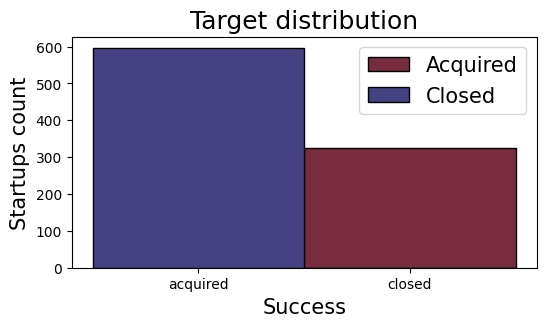

In [117]:
###   Visualizing the distribution of target classes: "acquired" and "closed" based on 
#the Labels column
from matplotlib import pyplot as plt
import seaborn as sns
classes = clean_data['status'].value_counts()
plt.figure(figsize=(6, 3))
sns.histplot(clean_data, x=clean_data['status'], binwidth=0.1, hue=clean_data["status"], palette="icefire", alpha=1 )
plt.legend(['Acquired', 'Closed'], fontsize=15)
plt.ylabel('Startups count',fontsize=15)
plt.xlabel('Success',fontsize=15)
plt.title('Target distribution',fontsize=18)
plt.show()

 Tranforming target variable to numerical values 

In [118]:
clean_data['status'] = clean_data.status.map({'acquired':1, 'closed':0})
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,0
5,CA,Mountain View,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,...,network_hosting,0,0,0,1,0,0,3.0000,1,0
6,CA,Mountain View,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,...,software,1,0,1,1,0,0,1.6667,1,1
7,CA,San Rafael,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,...,finance,0,0,1,1,0,1,3.5000,1,1
8,MA,Williamstown,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,...,mobile,1,0,1,0,0,1,4.0000,1,1
9,CA,Palo Alto,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,...,web,1,1,1,0,0,0,1.0000,1,1


Converting Datetime to Numerical values

- Following variables : 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'

In [119]:
import pandas as pd
# Assuming your_data_df is your main DataFrame
data_df = clean_data

# List of date columns
date_columns = ['founded_at','closed_at', 'first_funding_at', 'last_funding_at']

# Convert date columns to datetime
for date_column in date_columns:
    data_df[date_column] = pd.to_datetime(data_df[date_column], errors='coerce')

# Convert datetime to timestamp (numerical)
for date_column in date_columns:
    data_df[date_column] = data_df[date_column].astype(int)


In [120]:
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,1167609600000000000,-9223372036854775808,1238544000000000000,1262304000000000000,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,946684800000000000,-9223372036854775808,1108339200000000000,1261958400000000000,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,1237334400000000000,-9223372036854775808,1269907200000000000,1269907200000000000,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,1009843200000000000,-9223372036854775808,1108598400000000000,1177459200000000000,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,1280620800000000000,1349049600000000000,1280620800000000000,1333238400000000000,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,0
5,CA,Mountain View,1009843200000000000,1234656000000000000,1153180800000000000,1153180800000000000,4.5452,4.5452,5.0027,5.0027,...,network_hosting,0,0,0,1,0,0,3.0000,1,0
6,CA,Mountain View,1104537600000000000,-9223372036854775808,1158796800000000000,1268870400000000000,1.7205,5.2110,3.0000,6.6082,...,software,1,0,1,1,0,0,1.6667,1,1
7,CA,San Rafael,1072915200000000000,-9223372036854775808,1124841600000000000,1286150400000000000,1.6466,6.7616,5.6055,7.3616,...,finance,0,0,1,1,0,1,3.5000,1,1
8,MA,Williamstown,1009843200000000000,-9223372036854775808,1122940800000000000,1360281600000000000,3.5863,11.1123,8.0055,9.9945,...,mobile,1,0,1,0,0,1,4.0000,1,1
9,CA,Palo Alto,1117584000000000000,-9223372036854775808,1170288000000000000,1265328000000000000,1.6712,4.6849,2.9178,6.1151,...,web,1,1,1,0,0,0,1.0000,1,1


Converting categorical to Numerical values
- Following variables : 'state_code', 'city', 'category_code'

In [121]:
import pandas as pd

# List of categorical columns
categorical_columns = ['state_code', 'city', 'category_code']

# Create a function to generate mappings
def create_mapping(column):
    unique_values = clean_data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    clean_data[column] = clean_data[column].map(mapping)

In [122]:
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,0,0,1167609600000000000,-9223372036854775808,1238544000000000000,1262304000000000000,2.2493,3.0027,4.6685,6.7041,...,0,0,1,0,0,0,0,1.0000,0,1
1,0,1,946684800000000000,-9223372036854775808,1108339200000000000,1261958400000000000,5.1260,9.9973,7.0055,7.0055,...,1,1,0,0,1,1,1,4.7500,1,1
2,0,0,1237334400000000000,-9223372036854775808,1269907200000000000,1269907200000000000,1.0329,1.0329,1.4575,2.2055,...,2,0,0,1,0,0,0,4.0000,1,1
3,0,2,1009843200000000000,-9223372036854775808,1108598400000000000,1177459200000000000,3.1315,5.3151,6.0027,6.0027,...,3,0,0,0,1,1,1,3.3333,1,1
4,0,3,1280620800000000000,1349049600000000000,1280620800000000000,1333238400000000000,0.0000,1.6685,0.0384,0.0384,...,4,1,1,0,0,0,0,1.0000,1,0
5,0,4,1009843200000000000,1234656000000000000,1153180800000000000,1153180800000000000,4.5452,4.5452,5.0027,5.0027,...,5,0,0,0,1,0,0,3.0000,1,0
6,0,4,1104537600000000000,-9223372036854775808,1158796800000000000,1268870400000000000,1.7205,5.2110,3.0000,6.6082,...,3,1,0,1,1,0,0,1.6667,1,1
7,0,5,1072915200000000000,-9223372036854775808,1124841600000000000,1286150400000000000,1.6466,6.7616,5.6055,7.3616,...,6,0,0,1,1,0,1,3.5000,1,1
8,1,6,1009843200000000000,-9223372036854775808,1122940800000000000,1360281600000000000,3.5863,11.1123,8.0055,9.9945,...,7,1,0,1,0,0,1,4.0000,1,1
9,0,7,1117584000000000000,-9223372036854775808,1170288000000000000,1265328000000000000,1.6712,4.6849,2.9178,6.1151,...,2,1,1,1,0,0,0,1.0000,1,1


In [123]:
numerical_features = clean_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = clean_data.select_dtypes(include=['object']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['status']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (24):
['state_code', 'city', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']

Categorical Features (0):
[]

Target Variable (1):
['status']


##### 3. Exploratory Data Analysis (EDA)


The central aim of Exploratory Data Analysis (EDA) is to investigate relationships between variables using various techniques, including data visualization, statistical metrics (such as correlations), and trend analysis. These methods help identify patterns and trends within datasets, offering valuable insights that contextualize the predictive modeling problem.

Some of the visualization methods that we will be use are:

**3.1 Correlation Analysis:** 

Heatmap facilitates the identification of highly correlated explanatory variables and reduce collinearity

**3.2 Univariate Analysis:( statistical analysis of a single variable at a time)** 

Histogram and Bar Chart help to visualize the distribution and variance of each variable

**3.3 Bivariate Analysis:(simultaneous analysis of two variables to understand the relationships between them)** 

Box plot and Grouped bar chart help to spot the dependency and relationship between explanatory variables and response variable
(to have a better understanding of the data, exploratory data analysis can be performed before data transformation) 

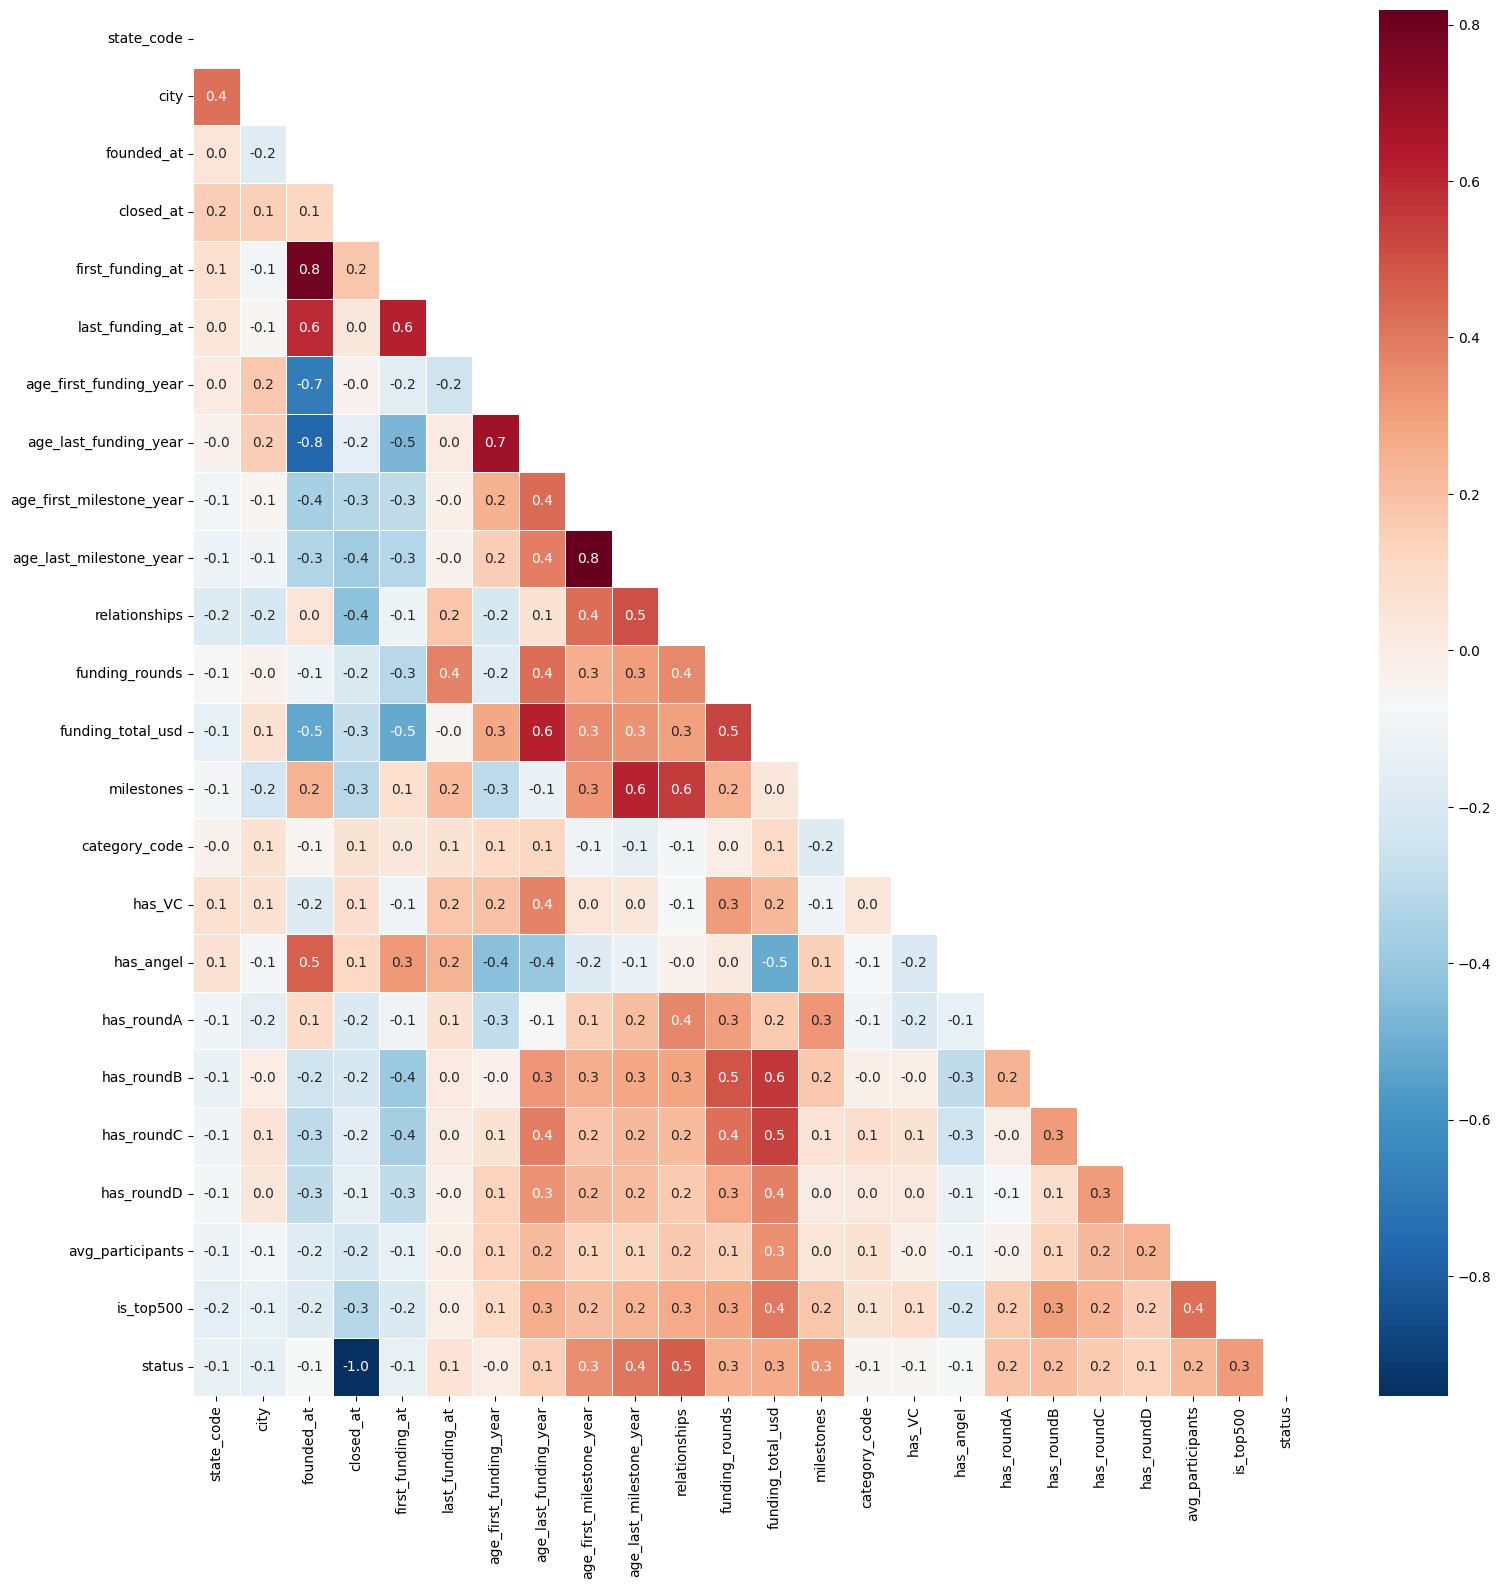

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def draw_heatmap(clean_data):
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    corrMatt = clean_data.corr(method='spearman')
    
    # Create a mask to hide the upper triangular part
    #To avoid redundancy and improve readability, it's common to visualize only one triangular part of the correlation matrix. 
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    
    sns.heatmap(corrMatt, annot=True, linewidth=0.5, fmt='.1f', ax=ax, cmap=cmap, mask=mask)
    plt.show()
    ax.set_title('Multi-Collinearity of Features')

# Assuming 'data' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df_1 = clean_data.select_dtypes(numerics)

draw_heatmap(numerical_df_1)

*3.4 Correlation Analysiss*

- Correlation heatmaps are particularly important in identifying potential multicollinearity among variables 
- (two or more features in a model are correlated with one another).
- -1 signifies zero correlation  (investigate)
- 1 signifies a perfect correlation.

and its value indicates the strength and direction of the linear relationship between two variables.

Looking at this correlation,  
We can see that age_first_funding_year and age_last_funding_year are highly correlated.
and also age_first_milestone and age_last_milestone are all pretty correlated with each other.

I may have to remove one or more of these three variables in order to optimize my model and prevent multicolinearity.However Random Forests provide a measure of variable importance. 

We will check the feature importance scores to understand which variables contribute the most to the model. If the age-related variables are highly important, removing them might not be advisable.

While Random Forests are more robust to multicollinearity, it's still beneficial to explore the impact of correlated variables on model performance. 

If the age-related variables are important for prediction, removing them might not be necessary. Always make decisions based on a thorough evaluation of model behavior and alignment with the goals of your analysis.

*3.5 Univariate Analysis*

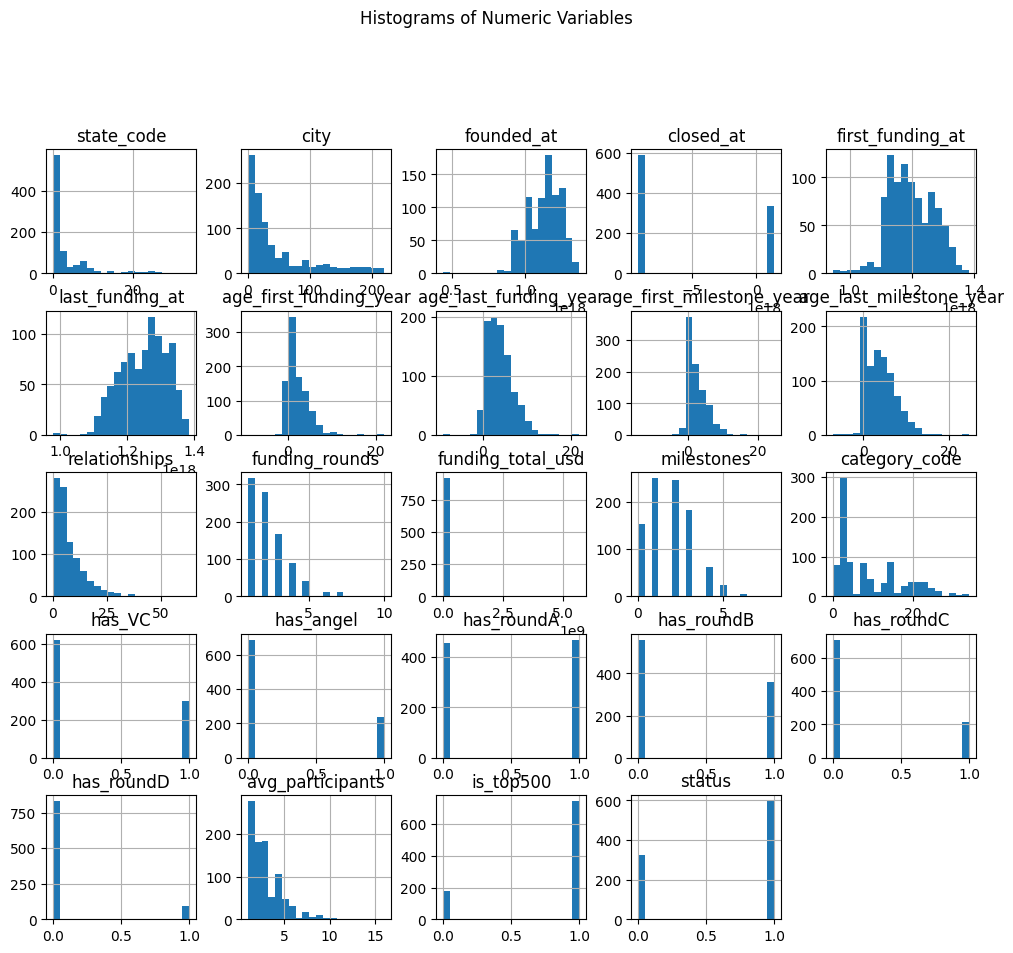

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'df' is your DataFrame containing the dataset
# Histograms for Numeric Variables
numeric_cols = clean_data.select_dtypes(include='number').columns
clean_data[numeric_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numeric Variables', y=1.02)
plt.show()

*3. Bivariate Analysis*

#### 5. Data Segmentation

#####  5.1 Define the inputs and the target #####

In [126]:
inputs= clean_data.drop('status', axis=1)  # Input features (exclude 'status' column)
target = clean_data['status']  # Target variable

In [127]:
##This line of code is just to confirm that the colum of target(Purchased)is binary
#from the beggining we could see that were binary because we have Class 0(acquired) and Class 1(closed)
import numpy as np
unique_values = np.unique(target)
if len(unique_values) == 2:
    print("Your target variable is binary.")
else:
    print("Your target variable is not binary.")

Your target variable is binary.


In [128]:
target

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int64

In [129]:
inputs 

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0,0,1167609600000000000,-9223372036854775808,1238544000000000000,1262304000000000000,2.2493,3.0027,4.6685,6.7041,...,3,0,0,1,0,0,0,0,1.0000,0
1,0,1,946684800000000000,-9223372036854775808,1108339200000000000,1261958400000000000,5.1260,9.9973,7.0055,7.0055,...,1,1,1,0,0,1,1,1,4.7500,1
2,0,0,1237334400000000000,-9223372036854775808,1269907200000000000,1269907200000000000,1.0329,1.0329,1.4575,2.2055,...,2,2,0,0,1,0,0,0,4.0000,1
3,0,2,1009843200000000000,-9223372036854775808,1108598400000000000,1177459200000000000,3.1315,5.3151,6.0027,6.0027,...,1,3,0,0,0,1,1,1,3.3333,1
4,0,3,1280620800000000000,1349049600000000000,1280620800000000000,1333238400000000000,0.0000,1.6685,0.0384,0.0384,...,1,4,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0,3,1230768000000000000,-9223372036854775808,1247097600000000000,1247097600000000000,0.5178,0.5178,0.5808,4.5260,...,2,15,0,0,1,0,0,0,6.0000,1
919,1,98,883612800000000000,1214352000000000000,1112313600000000000,1174608000000000000,7.2521,9.2274,6.0027,6.0027,...,1,10,1,0,0,1,0,0,2.6667,1
920,0,28,915148800000000000,1339891200000000000,1183075200000000000,1183075200000000000,8.4959,8.4959,9.0055,9.0055,...,1,20,0,0,0,0,0,1,8.0000,1
921,0,3,1230768000000000000,-9223372036854775808,1254700800000000000,1320105600000000000,0.7589,2.8329,0.7589,3.8356,...,2,3,0,0,1,1,0,0,1.0000,1


In [130]:
print(inputs['state_code'].head(20))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    2
13    3
14    4
15    5
16    0
17    0
18    3
19    0
Name: state_code, dtype: int64


In [131]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

#### 6. Model Training

**Cross Validation**

Cross validation is applied to compare and select the best model. 
Three models are used with cross validation, that is, Random Forest, Logistic Regression and Decision Trees. Random Forest has the best average score of 0.99 and is selected for building the final model. 

- Random Forest 
- Gradient Boosting 
- Decision Tree Classifier 
  
cross_val_score is used for evaluating the performance of a model using cross-validation without hyperparameter tuning.

**Decision Tree Classifier** 

In [132]:
from sklearn import tree

kf = KFold(n_splits=5, shuffle=True, random_state=42)

score_dt =  cross_val_score(tree.DecisionTreeClassifier(random_state = 42),
                         x_train,  y_train, cv = kf , scoring = "accuracy")
print(f'Scores for each fold are : {score_dt}')
print(f'Average score {"{:.2f}".format(score_dt.mean())}')

Scores for each fold are : [0.99324324 0.95945946 0.98648649 0.97959184 0.98639456]
Average score 0.98


**Gradient Boosting**

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

score_gb = cross_val_score(GradientBoostingClassifier(random_state=42), x_train, y_train, cv=kf, scoring="accuracy")
# Print scores for each fold
print(f'Scores for each fold are: {score_gb}')
# Print average score
print(f'Average score: {"{:.2f}".format(score_gb.mean())}')


Scores for each fold are: [1.         0.97972973 0.98648649 0.98639456 0.98639456]
Average score: 0.99


**Random Forest** 

In [134]:
from sklearn import ensemble

score_rf = cross_val_score(ensemble.RandomForestClassifier(random_state = 42),
                        x_train, y_train, cv = kf, scoring = "accuracy")
print(f'Scores for each fold are : {score_rf}')
print(f'Average score {"{:.2f}".format(score_rf.mean())}')

Scores for each fold are : [1.         0.98648649 0.98648649 0.99319728 0.98639456]
Average score 0.99


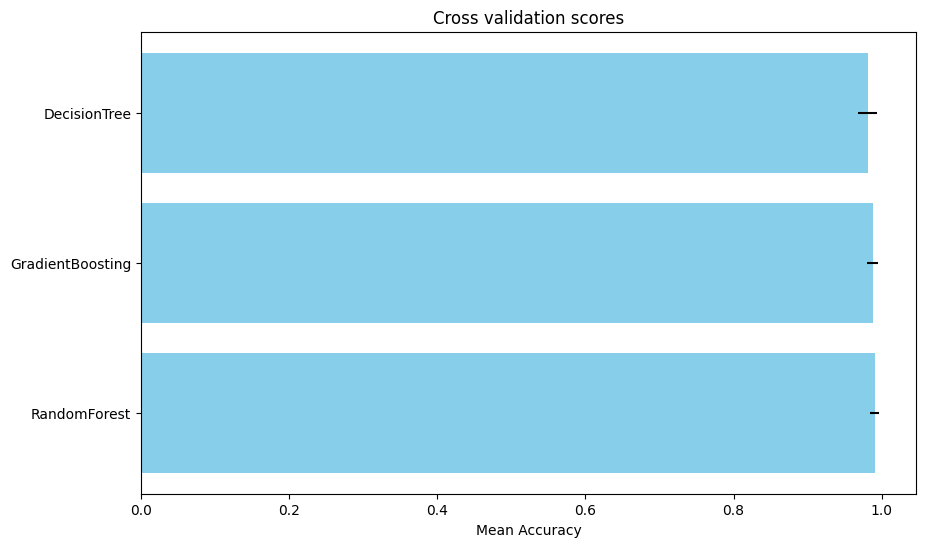

In [135]:

# Creating a DataFrame with the results
cv_results = pd.DataFrame({
    "Algorithm": ["RandomForest", "GradientBoosting", "DecisionTree"],
    "CrossValMeans": [pd.Series(score_rf).mean(), pd.Series(score_gb).mean(), pd.Series(score_dt).mean()],
    "CrossValErrors": [pd.Series(score_rf).std(), pd.Series(score_gb).std(), pd.Series(score_dt).std()]
})

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(cv_results["Algorithm"], cv_results["CrossValMeans"], xerr=cv_results["CrossValErrors"], color="skyblue")
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")
plt.show()


#### 9. Optimizing hyperparameters with SearchGridCV ###

So now that i have found the best model, i will aplied grid search to find the best hyperparameter.

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [137]:
random_forest_model = RandomForestClassifier(random_state=42)
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
# Apply GridSearchCV
grid_search_rf = GridSearchCV(random_forest_model, param_grid, cv=kf, scoring='accuracy')
best_model_grid = grid_search_rf.fit(x_train, y_train)

# Print the best hyperparameters for the Random Forest model
print("Random Forest Best Hyperparameters:", grid_search_rf.best_params_)
# Optionally, you can print other information such as the best score
print("Random Forest Best Accuracy:", grid_search_rf.best_score_)


Random Forest Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best Accuracy: 0.9905129619415334


In [138]:
best_model = best_model_grid.best_estimator_

In [139]:
# Get feature importances
feature_importances = best_model.feature_importances_

In [140]:
# Get feature names (assuming column names are feature names)
feature_names = x_train.columns

In [141]:
# Sort indices by importance
indices = np.argsort(feature_importances)

#### Feature Importance  ####

**How can Random Forest calculate feature importance?**

For classification, the measure of impurity (degree of disorder or uncertainty in a set of data) . The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

To give a better intuition, features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.

**The SelectFromModel object automates the process of selecting important features based on a pre-trained model, making it a convenient tool for feature selection in machine learning workflows.**

**If a feature consistently leads to lower impurity (more organized and clear decisions) across the ensemble of trees, it is deemed important for predicting the target variable in the overall Random Forest model.**

After identifying important features, you can filter your dataset to keep only those features. This reduces the dimensionality of your data and may lead to simpler and more interpretable models.

In [142]:
from sklearn.feature_selection import SelectFromModel
# Use the best model for feature selection
sel = SelectFromModel(best_model)
sel.fit(x_train, y_train)
# Get selected features
selected_feat = x_train.columns[sel.get_support()]
# Print or use the selected features as needed
print(selected_feat)


Index(['closed_at', 'age_first_milestone_year', 'age_last_milestone_year',
       'relationships'],
      dtype='object')


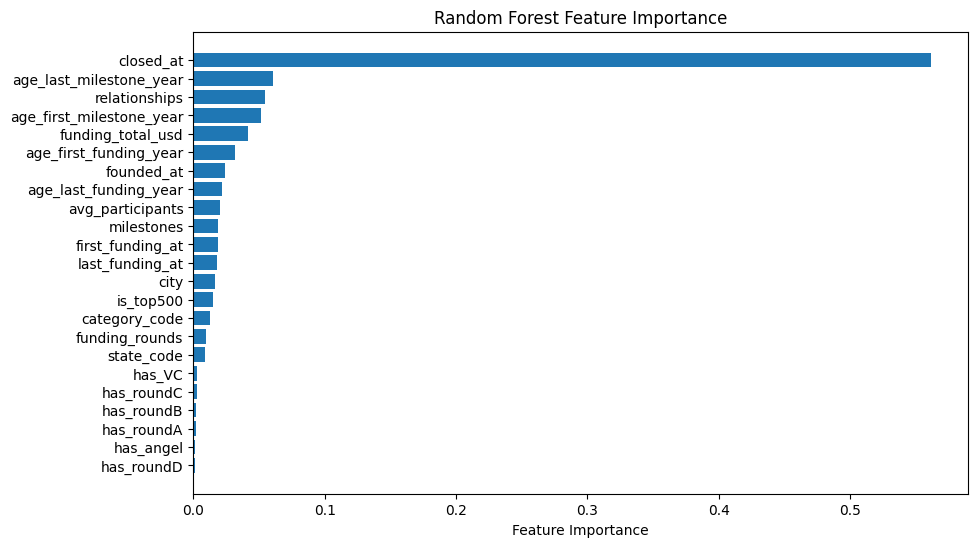

In [143]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

Using the resulting best model, we predict the client status using a new test data set.

#### 7. Model Testing

In [144]:
# Obtain the model's predictions on the test dataset
from sklearn.metrics import accuracy_score
y_test_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9891891891891892


In [145]:
y_test_pred


array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0])

In [146]:
predicted_df = pd.DataFrame(y_test_pred, columns= ["status"])

In [147]:
predicted_df ["status"].value_counts()

status
1    110
0     75
Name: count, dtype: int64

#### 8.  Model Evaluation


In [148]:
def model_performance(predicted_values, y_test):

    ### 8- Model Performance Visualization Confusion of Matrix 
    print("Confusion Matrix:")
    confusion_matrix_display = ConfusionMatrixDisplay.from_predictions(
        y_test, predicted_values,
        labels = best_model.classes_,
        cmap = 'magma'
    );
    ### 9- Classification Report
    print("Classification Report:")
    report = classification_report(y_test, predicted_values, target_names = ['acquired', 'closed'])
    print(report)

    return confusion_matrix_display,report

##### Confusion Matrix and Analysis: ####

Print a classification report

Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

    acquired       0.97      1.00      0.99        73
      closed       1.00      0.98      0.99       112

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



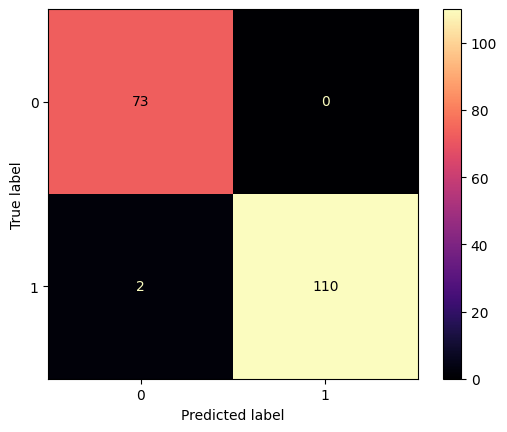

In [149]:
confusion_matrix_display,report= model_performance(y_test_pred, y_test)

Interpretation:
- True Positive (TP): 73 instances were correctly predicted as "acquired."
- False Positive (FP): 0 instances were incorrectly predicted as "acquired."
- True Negative (TN): 112 instances were correctly predicted as "closed."
- False Negative (FN): 2 instances were incorrectly predicted as "closed."

#### Saving and Loading Machine Learning Models with joblib in Python ####

Once a model is trained and optimized, it's essential to save its state for future use or deployment.

- The joblib library is a powerful tool for efficiently handling large NumPy arrays and is commonly used in the machine learning community for saving and loading models.

In [150]:
#Remember to re-run the saving and loading code whenever you make significant changes 
#to your model and want to persist those changes.

import joblib
# Defining the File Path
# we set the file path where we intend to save and later load our machine learning model. 
# The chosen file path is '../data/best_model.joblib', indicating that the model will be saved in the 'data' directory.
file_path = '../data/best_model.joblib'

# Save the entire model
joblib.dump(best_model, file_path)
# Load the entire model
# The joblib.load function is used to load the serialized model from the file specified by file_path.
# The loaded model is then assigned to the variable loaded_model, making it ready for further use.
loaded_model = joblib.load(file_path)